# Copying files from kaggle directory to working directory and creating separate directories for each class


**For Covid-19**


In [3]:
import os
import shutil

def copy_content(dir1_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Copied files from {dir1_path} to {output_folder_path}")

dir1 = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images"
output_folder = "/kaggle/working/X-Ray_Dataset/COVID-19"

copy_content(dir1, output_folder)

Copied files from /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images to /kaggle/working/X-Ray_Dataset/COVID-19


**For Pneumonia Images**


In [4]:
def copy_content(dir1_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Copied files from {dir1_path} to {output_folder_path}")

dir1 = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
output_folder = "/kaggle/working/X-Ray_Dataset/Pneumonia-Viral"

copy_content(dir1, output_folder)

Copied files from /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images to /kaggle/working/X-Ray_Dataset/Pneumonia-Viral


**For Normal Images**


In [5]:
def copy_content(dir1_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Copied files from {dir1_path} to {output_folder_path}")

dir1 = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images"
output_folder = "/kaggle/working/X-Ray_Dataset/Normal"

copy_content(dir1, output_folder)

Copied files from /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images to /kaggle/working/X-Ray_Dataset/Normal


**For Lung Opacity Images**


In [6]:
def copy_content(dir1_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Copied files from {dir1_path} to {output_folder_path}")

dir1 = "/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images"
output_folder = "/kaggle/working/X-Ray_Dataset/Lung_Opacity"

copy_content(dir1, output_folder)

Copied files from /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images to /kaggle/working/X-Ray_Dataset/Lung_Opacity


# Check number of Images in each directory


In [7]:
output_dir = '/kaggle/working/X-Ray_Dataset'  # For Kaggle environment
class_names = ['COVID-19', 'Normal', 'Pneumonia-Viral', 'Lung_Opacity']

# Count images before splitting
for class_name in class_names:
    class_dir = os.path.join(output_dir, class_name)

    if os.path.exists(class_dir):
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Directory not found: {class_dir}")

COVID-19: 3616 images
Normal: 10192 images
Pneumonia-Viral: 1345 images
Lung_Opacity: 6012 images


# Train, Test and Val split


In [8]:
from sklearn.model_selection import train_test_split

base_dir = '/kaggle/working/X-Ray_Dataset'
output_dir = '/kaggle/working/preprocessed_data'

# Output directories for train, validation, and test sets
for split in ['train', 'val', 'test']:
    for class_name in ['COVID-19', 'Normal', 'Pneumonia-Viral', 'Lung_Opacity']:
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

def copy_files(files, src_dir, dest_dir):
    for f in files:
        try:
            shutil.copy(os.path.join(src_dir, f), os.path.join(dest_dir, f))
        except Exception as e:
            print(f"Error copying {f}: {e}")

# Split and copy data
for class_name in ['COVID-19', 'Normal', 'Pneumonia-Viral', 'Lung_Opacity']:
    class_dir = os.path.join(base_dir, class_name)
    
    if os.path.exists(class_dir) and len(os.listdir(class_dir)) > 0:
        files = os.listdir(class_dir)

        # Train+val (80%) and test (20%)
        train_val, test = train_test_split(files, test_size=0.2, random_state=42)

        # Split train_val into train (70% of original) and validation (10% of original)
        train, val = train_test_split(train_val, test_size=0.125, random_state=42)

        copy_files(train, class_dir, os.path.join(output_dir, 'train', class_name))
        copy_files(val, class_dir, os.path.join(output_dir, 'val', class_name))
        copy_files(test, class_dir, os.path.join(output_dir, 'test', class_name))

        print(f"{class_name}: {len(train)} train, {len(val)} val, {len(test)} test files copied.")
    else:
        print(f"Directory not found or empty: {class_dir}")

print("Data split and copied successfully!")

COVID-19: 2530 train, 362 val, 724 test files copied.
Normal: 7133 train, 1020 val, 2039 test files copied.
Pneumonia-Viral: 941 train, 135 val, 269 test files copied.
Lung_Opacity: 4207 train, 602 val, 1203 test files copied.
Data split and copied successfully!


In [9]:
train_dir = '/kaggle/working/preprocessed_data/test'
print("Classes in train directory:")
print(os.listdir(train_dir))

Classes in train directory:
['COVID-19', 'Normal', 'Pneumonia-Viral', 'Lung_Opacity']


# Check class distribution


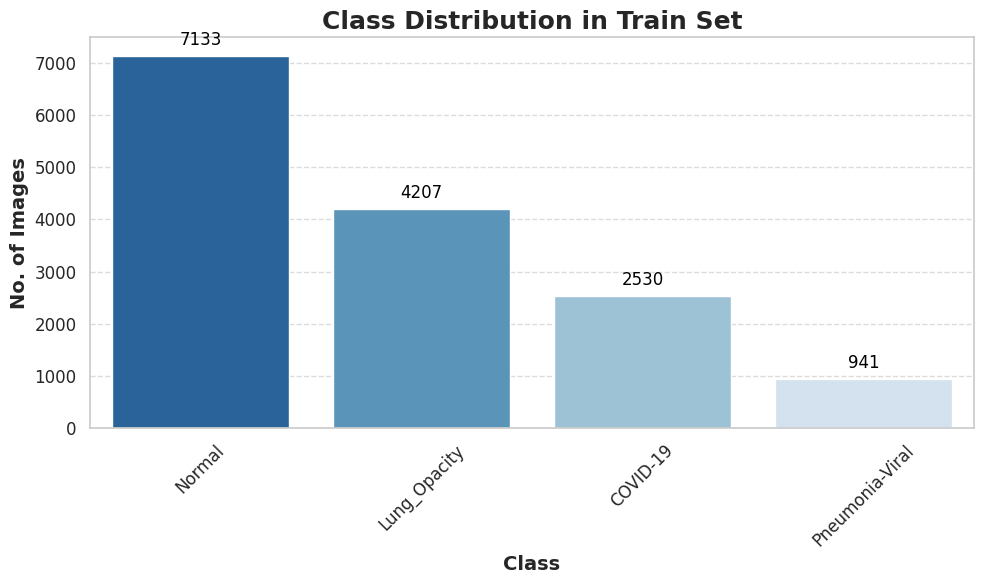

In [12]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

train_dir = '/kaggle/working/preprocessed_data/train'

categories = ['COVID-19', 'Normal', 'Pneumonia-Viral', 'Lung_Opacity']

train_labels = []
for category in categories:
    category_path = os.path.join(train_dir, category)
    num_files = len(os.listdir(category_path))

    train_labels += [category] * num_files

df = pd.DataFrame({'class': train_labels})
class_counts = df['class'].value_counts().sort_values(ascending=False)

sorted_df = pd.DataFrame({'class': class_counts.index, 'count': class_counts.values})

plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid") 
colors = sns.color_palette("Blues_r", len(sorted_df))
bar_plot = sns.barplot(x='class', y='count', data=sorted_df, palette=colors)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),
                      textcoords='offset points')

plt.title('Class Distribution in Train Set', fontsize=18, fontweight='bold')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('No. of Images', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#


**Import necessary libraries**


In [13]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_dir = "/kaggle/working/preprocessed_data/train"
test_dir = "/kaggle/working/preprocessed_data/test"
val_dir = "/kaggle/working/preprocessed_data/val"

In [15]:
train_gen = ImageDataGenerator( rescale= 1. / 255 )
test_gen = ImageDataGenerator(rescale = 1. / 255)
val_gen = ImageDataGenerator(rescale = 1. / 255)

In [16]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size = 128,
    class_mode='sparse'  # or 'categorical'
)
print(train_generator.class_indices)

Found 14811 images belonging to 4 classes.
{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Pneumonia-Viral': 3}


In [17]:
test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'sparse'
)
print(test_generator.class_indices)

Found 4235 images belonging to 4 classes.
{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Pneumonia-Viral': 3}


In [18]:
val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'sparse'
)
print(val_generator.class_indices)

Found 2119 images belonging to 4 classes.
{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Pneumonia-Viral': 3}


# **Model building and fine-tuning**


In [19]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import models

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import backend as K
import os

**Load Pre-trained model**


In [21]:
# Load VGG19 with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last block
for layer in base_model.layers:
    print(layer.name)
    if 'block5' in layer.name:
        layer.trainable = True

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


**Verify if the layers in block5 are unfreezed**

It's common to freeze certain layers of a model while allowing others to remain trainable. The block5 layers often contain the most complex features learned from the dataset. By unfreezing these layers, you're allowing the model to adapt and fine-tune these features for the specific task at hand.


In [22]:
for layer in base_model.layers:
    if 'block5' in layer.name:
        print(f"Layer {layer.name} is {'trainable' if layer.trainable else 'frozen'}")

Layer block5_conv1 is trainable
Layer block5_conv2 is trainable
Layer block5_conv3 is trainable
Layer block5_conv4 is trainable
Layer block5_pool is trainable


**Check if the first layer is frozen**

This is common practice when using pre-trained models (like those from transfer learning), where you want to retain the learned features from the earlier layers.


In [23]:
for layer in base_model.layers:
  print(f"First layer {layer.name} is {'trainable' if layer.trainable else 'frozen'}")

First layer input_layer is frozen
First layer block1_conv1 is frozen
First layer block1_conv2 is frozen
First layer block1_pool is frozen
First layer block2_conv1 is frozen
First layer block2_conv2 is frozen
First layer block2_pool is frozen
First layer block3_conv1 is frozen
First layer block3_conv2 is frozen
First layer block3_conv3 is frozen
First layer block3_conv4 is frozen
First layer block3_pool is frozen
First layer block4_conv1 is frozen
First layer block4_conv2 is frozen
First layer block4_conv3 is frozen
First layer block4_conv4 is frozen
First layer block4_pool is frozen
First layer block5_conv1 is trainable
First layer block5_conv2 is trainable
First layer block5_conv3 is trainable
First layer block5_conv4 is trainable
First layer block5_pool is trainable


**Add custom layers**


In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

**Create final model**


In [25]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

**Compile the model**


In [27]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
import os

num_cores = os.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

Number of CPU cores available: 4


**Callbacks for Checkpoints and Early Stopping**


In [29]:
checkpoint_full_model = ModelCheckpoint(
    filepath='model_full.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
checkpoint_weights_only = ModelCheckpoint(
    filepath='model.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

**Train Model**


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=64,
    callbacks=[checkpoint_full_model, checkpoint_weights_only, early_stopping]
)

**Save the trained model**


In [ ]:
model.save('Covid19-XRay.h5')

# Plot learning curve


In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, metrics):
    acc = history.history[metrics]
    val_acc = history.history[f'val_{metrics}']
    epochs = range(len(acc))

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc, label=f'Training {metrics}', color='royalblue', linestyle='-', marker='o', markersize=5)
    plt.plot(epochs, val_acc, label=f'Validation {metrics}', color='orange', linestyle='-', marker='o', markersize=5)

    plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')

    plt.title('Learning Curve', fontsize=18, fontweight='bold')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(metrics.capitalize(), fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

**For accuracy**


In [ ]:
plot_learning_curve(history=history, metrics='accuracy')

**For loss**


In [ ]:
plot_learning_curve(history=history, metrics='loss')

# Evaluate the model


In [ ]:
train_result = model.evaluate(train_generator)
test_result = model.evaluate(test_generator)
val_result = model.evaluate (val_generator)

In [ ]:
print('Train loss:', (np.round(train_result[0], 4)))
print('Test loss:', (np.round(test_result[0], 4)))
print('Val loss:', (np.round(val_result[0], 4)))

print('Train accuracy:', (np.round(train_result[1], 4) * 100) , '%')
print('Test accuracy:', (np.round(test_result[1], 4) * 100) , '%')
print('Val accuracy:', (np.round(val_result[1], 4) * 100) , '%')

# Show confusion matrix


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_predicts = []
test_targets = []

for batch_index, (x_test, y_test) in enumerate(test_generator):
    if batch_index >= len(test_generator):
        break
    test_predict = model.predict(x_test)

    batch_predicts = test_predict.argmax(axis=1)
    batch_targets = y_test

    test_predicts.append(batch_predicts)
    test_targets.append(batch_targets)

test_predicts = np.concatenate(test_predicts)
test_targets = np.concatenate(test_targets)

print("Overall Classification Report:")
print(classification_report(test_targets, test_predicts))

overall_cm = confusion_matrix(test_targets, test_predicts)
print("Overall Confusion Matrix:")
print(overall_cm)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(10, 7))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names ,
            yticklabels=class_names )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Overall Confusion Matrix')
plt.show()